In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


In [4]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train =y_train.reshape(-1,)

In [11]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [13]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

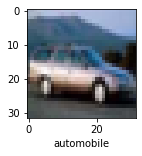

In [26]:
plot_sample(x_train, y_train, 4)

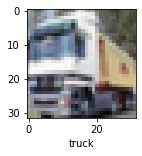

In [27]:
plot_sample(x_train, y_train, 1)

In [28]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [29]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.8603 - accuracy: 0.3347
Epoch 2/5
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.6591 - accuracy: 0.4131
Epoch 3/5
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.5694 - accuracy: 0.4466
Epoch 4/5
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.5071 - accuracy: 0.4691
Epoch 5/5
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.4569 - accuracy: 0.4854


In [30]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.64      0.55      1000
           1       0.56      0.61      0.58      1000
           2       0.46      0.21      0.29      1000
           3       0.42      0.23      0.30      1000
           4       0.49      0.29      0.37      1000
           5       0.45      0.33      0.38      1000
           6       0.49      0.62      0.55      1000
           7       0.43      0.67      0.53      1000
           8       0.64      0.47      0.55      1000
           9       0.41      0.70      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.46     10000
weighted avg       0.48      0.48      0.46     10000



In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [32]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
cnn.fit(x_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 25s 503us/sample - loss: 1.4942 - accuracy: 0.4616
Epoch 2/10
50000/50000 [==============================] - 27s 537us/sample - loss: 1.1354 - accuracy: 0.6026
Epoch 3/10
50000/50000 [==============================] - 28s 559us/sample - loss: 1.0043 - accuracy: 0.6507
Epoch 4/10
50000/50000 [==============================] - 28s 565us/sample - loss: 0.9231 - accuracy: 0.6811
Epoch 5/10
50000/50000 [==============================] - 28s 552us/sample - loss: 0.8584 - accuracy: 0.7012
Epoch 6/10
50000/50000 [==============================] - 26s 522us/sample - loss: 0.8075 - accuracy: 0.7177
Epoch 7/10
50000/50000 [==============================] - 27s 543us/sample - loss: 0.7639 - accuracy: 0.7341
Epoch 8/10
50000/50000 [==============================] - 27s 535us/sample - loss: 0.7229 - accuracy: 0.7493
Epoch 9/10
50000/50000 [==============================] - 26s 528us/sample - loss: 0.6868 - accuracy: 0.7

In [34]:
cnn.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 118us/sample - loss: 0.9212 - accuracy: 0.6976


[0.9211868320465088, 0.6976]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [36]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.5718918e-03, 1.9434960e-05, 4.6363930e-04, 8.0559522e-01,
        6.5151853e-03, 1.6578373e-01, 1.1383438e-03, 4.1428421e-04,
        1.7477868e-02, 2.0454207e-05],
       [6.9293035e-03, 7.7525592e-01, 1.0839832e-05, 6.5240979e-06,
        9.5713142e-07, 6.3919185e-07, 3.0748608e-06, 2.1099224e-07,
        1.9707799e-01, 2.0714568e-02],
       [8.6912997e-02, 2.0636687e-01, 4.6169022e-03, 1.0103412e-02,
        1.0801122e-02, 2.2672088e-04, 1.1972222e-03, 8.4040556e-03,
        1.8274787e-01, 4.8862293e-01],
       [1.4250977e-01, 2.9828059e-04, 2.9961171e-02, 4.5622978e-04,
        3.0249653e-03, 8.5679758e-06, 9.4863906e-04, 1.7637323e-05,
        8.2251835e-01, 2.5643944e-04],
       [2.1853323e-06, 3.8808710e-07, 6.2821181e-03, 1.2551344e-03,
        2.7362770e-01, 3.4032768e-05, 7.1879715e-01, 1.8034237e-07,
        9.8140117e-07, 1.8547108e-07]], dtype=float32)

In [37]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 9, 8, 6]

In [38]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

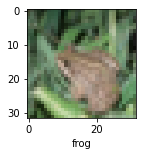

In [48]:
plot_sample(x_test, y_test,4)

In [49]:
classes[y_classes[4]]

'frog'

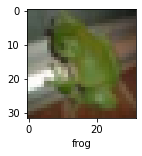

In [65]:
plot_sample(x_test, y_test,7)

In [58]:
classes[y_classes[3]]

'airplane'

In [45]:
classes


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']